In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
import io

In [6]:
# load csvs
price_hr = pd.read_csv('data/lrc_price_hr.csv')
price_day = pd.read_csv('data/lrc_price_day.csv')
comments = pd.read_csv('data/comments_no_txt.csv')

In [7]:
# convert dates to datetime objects
comments['datetime'] = pd.to_datetime(comments['datetime'])
price_hr['date'] = pd.to_datetime(price_hr['date'])
price_day['date'] = pd.to_datetime(price_day['date'])

In [8]:
# create df counting number of comments per day
comments_day = comments.groupby(by=comments['datetime'].dt.date).count()
comments_day = pd.DataFrame(comments_day['datetime'])
comments_day.rename(columns={'datetime': 'count'}, inplace=True)
comments_day.index = pd.to_datetime(comments_day.index)

# create empty dataframe with an index entry for every day of 2021
datelist = pd.DataFrame({'date': pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')})
datelist.set_index('date', inplace=True)

# merge daily comments with empty year dataframe to have a full year including days with no comments
comments_day = pd.concat([comments_day, datelist], axis=1)
comments_day['count'] = comments_day['count'].fillna(0)

In [9]:
# create df counting number of comments per hr
comments_hr = pd.DataFrame(comments['datetime'])
comments_hr['count'] = 1
comments_hr['datetime'] = pd.to_datetime(comments_hr['datetime'])
comments_hr.set_index('datetime', inplace=True)
comments_hr = comments_hr.resample('H').agg({'count':'sum'})
comments_hr.index = pd.to_datetime(comments_hr.index)

# create empty dataframe with an index entry for every hour of 2021
hourlist = pd.DataFrame({'datetime': pd.date_range('2021-01-01', '2021-12-31', freq='1H', inclusive='left')})
hourlist.set_index('datetime', inplace=True)

# merge daily comments with empty year dataframe to have a full year including hours with no comments
comments_hr = pd.concat([comments_hr, hourlist], axis=1)
comments_hr['count'] = comments_hr['count'].fillna(0)


In [15]:
comments_day['count'].describe()

count     365.000000
mean      226.742466
std       632.209582
min         0.000000
25%         3.000000
50%        10.000000
75%        42.000000
max      6142.000000
Name: count, dtype: float64

In [28]:
# bin day count data
comments_day_dec = comments_day
comments_day_dec['decile'] = pd.qcut(comments_day['count'], q=10)
comments_day_dec['decile'].value_counts()


(-0.001, 1.0]      54
(2.0, 4.0]         46
(29.8, 79.0]       37
(748.4, 6142.0]    37
(15.4, 29.8]       36
(79.0, 748.4]      36
(6.0, 10.0]        34
(10.0, 15.4]       32
(4.0, 6.0]         27
(1.0, 2.0]         26
Name: decile, dtype: int64

[]

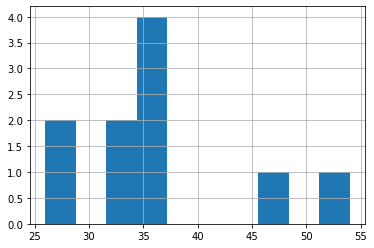

In [22]:
comments_day_dec['decile'].value_counts().hist()
plt.plot()

[]

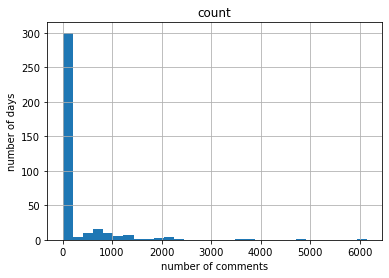

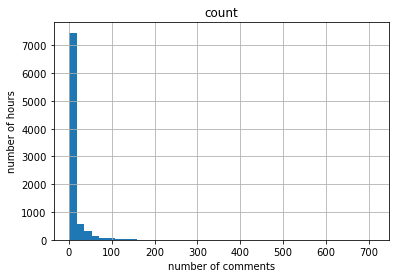

In [13]:
comments_day.hist(bins=30)
plt.xlabel('number of comments')
plt.ylabel('number of days')
comments_hr.hist(bins=40)
plt.xlabel('number of comments')
plt.ylabel('number of hours')
plt.plot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(price_hr['close'], comments_hr['count'], test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(price_day['close'], comments_day['count'], test_size=0.3, random_state=42)